<h2>Aplicación de SOM a dataset de vinos</h2>

<p>Estos datos son los resultados de un análisis químico de vinos cultivados en la misma región de Italia, pero derivados de tres variedades de uva diferentes. El análisis determinó las cantidades de 13 constituyentes encontrados en cada uno de los tres tipos de vinos.</p>

<p>Las características de los vinos son las siguientes:</p>
<ol>
  <li>Alcohol</li>
  <li>Ácido málico</li>
  <li>Cenizas</li>
  <li>Alcalinidad de las cenizas</li>
  <li>Magnesio</li>
  <li>Fenoles totales</li>
  <li>Flavonoides</li>
  <li>Fenoles no flavonoides</li>
  <li>Proantocianidinas</li>
  <li>Intensidad del color</li>
  <li>Matiz</li>
  <li>OD280/OD315 de vinos diluidos</li>
  <li>Prolina</li>
</ol>

In [1]:
!pip install sklearn-som

<h3>Entrenamiento de algoritmo</h3>

In [168]:
from sklearn_som.som import SOM
from sklearn import datasets
wine = datasets.load_wine()
wine_data = wine.data
wine_label = wine.target

wine_som = SOM(m=3, n=1, dim=13)
wine_som.fit(wine_data)
predictions = wine_som.predict(wine_data)
print(predictions)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 2 1 2 2 1 1 1 2 2 0
 1 2 2 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 1 2 2 1 1 2 2
 2 2 2 2 2 1 2 1 2 1 2 2 2 1 2 1 2 2 1 1 1 2 2 2 2 1 1 1 1 2]


<h3>Graficar dos dimensiones de los resultados</h3>

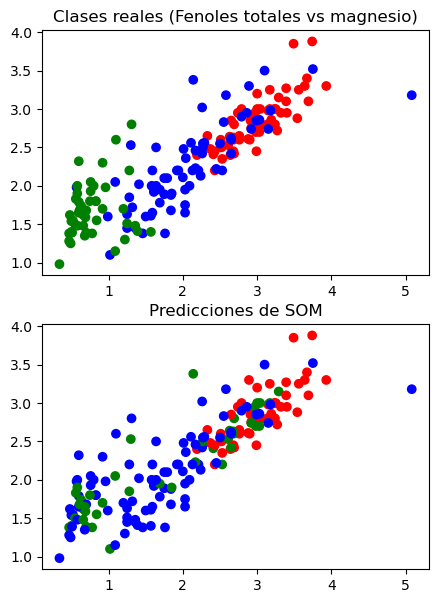

<Figure size 640x480 with 0 Axes>

In [180]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5,7))
x = wine_data[:,6]
y = wine_data[:,5]
colors = ['red', 'green', 'blue']
colors2 = ['red', 'blue', 'green']

ax[0].scatter(x, y, c=wine_label, cmap=ListedColormap(colors2))
ax[0].title.set_text('Clases reales (Fenoles totales vs magnesio)')
ax[1].scatter(x, y, c=predictions, cmap=ListedColormap(colors))
ax[1].title.set_text('Predicciones de SOM')
plt.show()
plt.savefig('vinos.png')